In [1]:
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

data = torch.load("alpha_1000_snapshot_2/loss_log.pt", map_location=torch.device("cpu"))

#train_dset = torch.load("alpha_1e-3/train.dset")
#print(len(train_dset))
#folder = "../../test_case_4/"

#gt_initial_beam = torch.load(folder + "ground_truth_dist.pt")


/global/homes/r/rroussel/.conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get predicted covariances
gamma = 65 / 0.511
cov = torch.cat([ele[-2].unsqueeze(0) for ele in data]) / 1e6
image_loss = torch.cat([ele[0].unsqueeze(0) for ele in data])
entropy_loss = torch.cat([ele[1].unsqueeze(0) for ele in data])
emits = []
for i in range(3):
    g = i*2
    emits.append(torch.det(cov[:, g:g+2,g:g+2]).sqrt() * gamma)
    print(emits[-1][-1])

tensor(1.3749e-05, grad_fn=<SelectBackward0>)
tensor(1.3586e-05, grad_fn=<SelectBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)


tensor(1.3749e-05, grad_fn=<SelectBackward0>)
tensor(1.3586e-05, grad_fn=<SelectBackward0>)
tensor(0.0017, grad_fn=<SelectBackward0>)


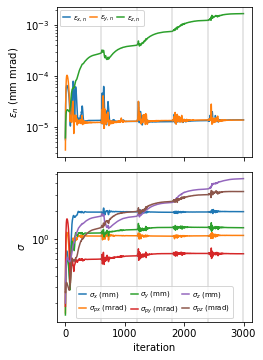

In [3]:
# plot emit_x


fig,(ax, ax2) = plt.subplots(2,1, sharex="all", gridspec_kw={"right": 0.975, "hspace":0.1,"left":0.175,"top":0.975,"bottom":0.1})
fig.set_size_inches(3.4,5)
labels = ["x", "y", "z"]
emit_scale = 1
n_estimators = 5
estimator_period = int(len(emits[0]) / n_estimators)
idx = slice(0, len(emits[0]))
t = torch.arange(len(emits[0]))[idx]
for i in range(3):
    print(emits[i][-1])
    ax.semilogy(t, emits[i].cpu().detach()[idx] * emit_scale,
                label=f"$\epsilon_{{{labels[i]},n}}$",
                c=f"C{i}")
    #ax.axhline(gt_emits[i].cpu().detach() * emit_scale / mean_energy,ls='--',c=f"C{i}")


sigmas = []
labels = ["x", "px", "y", "py", "z", "pz"]
units = ["mm", "mrad"]

sigma_scale = 1e3
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax2.semilogy(t, sigmas[-1].cpu().detach()[idx] * sigma_scale,
                 label=f"$\sigma_{{{labels[i]}}}$ ({units[i % 2]})",
                c=f"C{i}")
    #ax2.axhline(gt_rms[i].sqrt()*sigma_scale, ls='--', c=f"C{i}")


# add locations of snapshots
for ele in t[estimator_period::estimator_period-1]:
    for a in [ax, ax2]:
        a.axvline(ele, c = "C7",alpha=0.25)
    
ax.set_ylabel("$\epsilon_n$ (mm mrad)")
ax2.set_ylabel("$\sigma$ ")
ax2.set_xlabel("iteration")
fontsize = 7
handletextpad = 0.4
ax.legend(ncol=3, handlelength=1.0, columnspacing=0.5, fontsize=fontsize, handletextpad=handletextpad)
ax2.legend(ncol=3, handlelength=1.0, columnspacing=0.5, fontsize=fontsize, handletextpad=handletextpad)
#fig.tight_layout()
fig.savefig("convergence.svg")
fig.savefig("convergence.png", dpi=300)


NameError: name 'gt_rms' is not defined

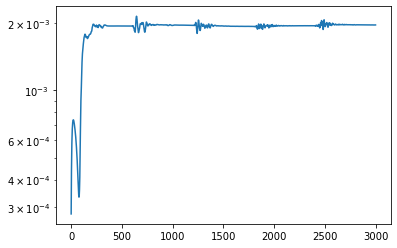

In [4]:
sigmas = []
fig,ax = plt.subplots()
labels = ["x", "px", "y", "py", "z", "pz"]
for i in range(6):
    sigmas.append(cov[:,i,i].sqrt())
    ax.semilogy(sigmas[-1].cpu().detach(),label=f"$\sigma_{{{labels[i]}}}$",
                c=f"C{i}")
    ax.axhline(gt_rms[i].sqrt(), ls='--', c=f"C{i}")

print(gt_rms[-i].sqrt())
ax.legend()

In [ ]:
plt.plot(image_loss.detach().cpu())
#plt.plot(entropy_loss.detach().cpu())